# ***STAGE 2 - DATA PRE-PROCESSING***

## ***Kelompok 7 - Lucky 8***

### Nama Anggota Kelompok :
1. Arif Budi Utomo;
2. M. Rivaldi Anwar Putra;
3. Natasya Indah;
4. Fathimah Azzahra Albaar;
5. Zahky Awal;
6. Dony Bagaskara;
7. Rahmawati;
8. Venessa.

# ***Import Libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('Numpy Version : ', np.__version__)
print('Pandas Version : ', pd.__version__)
print('Seaborn Version : ', sns.__version__)

Numpy Version :  1.23.4
Pandas Version :  1.5.2
Seaborn Version :  0.12.1


## ***Mengubah Parameter Default Matpotlib***

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# ***Load Dataset***

In [3]:
df = pd.read_csv('mc_eda.csv')

In [4]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_amount_spent,Total_accept_campaign
21,5376,1979,Graduation,Married,2447.0,1,0,2013-01-06,42,1,...,0,0,0,0,3,11,0,41,1729,0
1545,7321,1962,Graduation,Together,76081.0,0,0,2014-05-23,85,292,...,0,1,0,0,3,11,0,58,741,1
284,8148,1956,Master,Together,50898.0,1,1,2013-01-08,88,285,...,0,0,0,0,3,11,0,64,574,0
1064,11112,1966,Graduation,Together,70713.0,0,1,2012-12-03,23,736,...,0,0,0,0,3,11,0,54,741,0
87,4452,1957,Graduation,Single,50388.0,0,1,2014-05-28,3,292,...,0,1,0,0,3,11,1,63,80,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2229 non-null   int64  
 1   Year_Birth             2229 non-null   int64  
 2   Education              2229 non-null   object 
 3   Marital_Status         2229 non-null   object 
 4   Income                 2229 non-null   float64
 5   Kidhome                2229 non-null   int64  
 6   Teenhome               2229 non-null   int64  
 7   Dt_Customer            2229 non-null   object 
 8   Recency                2229 non-null   int64  
 9   MntWines               2229 non-null   int64  
 10  MntFruits              2229 non-null   int64  
 11  MntMeatProducts        2229 non-null   int64  
 12  MntFishProducts        2229 non-null   int64  
 13  MntSweetProducts       2229 non-null   int64  
 14  MntGoldProds           2229 non-null   int64  
 15  NumD

Pengamatan\:
1. Data terdiri dari `2229` baris;
2. Sudah tidak ada nilai null di setiap kolom (`Non-Null Count < jumlah baris`), nilai null sudah dihandle saat EDA kemarin; dan
3. Sepertinya terdapat issue yang mencolok pada tipe data untuk kolom `Dt_Customer`, seharusnya tipe datanya bukan object namun `datetime`. Namun, kolom ini nantinya akan didrop karena kami asumsikan bahwa kolom ini tidak relevan.

***Pengelompokkan Kolom***

In [6]:
# pengelompokan kolom berdasarkan jenisnya

cats = ['Education', 'Marital_Status']
nums = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response','Age','Total_amount_spent', 'Total_accept_campaign']
timestamp = ['Dt_Customer']


# pengelompokkan lebih spesifik untuk 'nums'

amount_spent = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
num_purchases = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
cmp = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
others1 = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency']
others2 = ['Complain', 'NumWebVisitsMonth', 'Age', 'Total_amount_spent', 'Total_accept_campaign']

In [7]:
# ringkasan statistik dari kolom numerik
df[amount_spent].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,304.991476,26.348587,165.283984,37.642441,27.161507,44.113055
std,336.761943,39.764060,219.336589,54.700548,41.338945,52.091255
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000
50%,176.000000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,505.000000,33.000000,231.000000,50.000000,34.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


Dari hasil pengamatan terlihat bahwa setiap kolom pada himpunan kolom `'amount_spent'` cenderung skew ke kanan (`mean > median`), terutama pada kolom `MntFruits` dan `MntMeatProducts`. Kolom-kolom tersebut memiliki gap yang terlalu besar antara nilai mean dan mediannya, mungkin dapat dilakukan transformasi log nantinya.

In [8]:
df[num_purchases].describe()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2229.000000,2229.000000,2229.000000,2229.000000
mean,2.319874,4.100045,2.636608,5.812472
std,1.895252,2.775461,2.796161,3.242144
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,3.000000
50%,2.000000,4.000000,2.000000,5.000000
75%,3.000000,6.000000,4.000000,8.000000
max,15.000000,27.000000,28.000000,13.000000


Untuk himpunan kolom `'num_purchases'`, kolom-kolom tersebut tampak sudah cukup simetris distribusinya. Tidak ada isu yang menonjol di sini.

In [9]:
df[cmp].describe()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,0.064603,0.013459,0.073127,0.074921,0.072678,0.149843
std,0.245879,0.115255,0.260403,0.263324,0.259666,0.356998
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Ternyata himpunan kolom `'cmp'` bernilai `boolean/binary`.

In [10]:
df[others1].describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,1968.888739,51619.504262,0.444594,0.507402,49.106326
std,11.707430,20601.216248,0.538636,0.544735,28.946476
min,1940.000000,1730.000000,0.000000,0.000000,0.000000
25%,1959.000000,35416.000000,0.000000,0.000000,24.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000
75%,1977.000000,68118.000000,1.000000,1.000000,74.000000
max,1996.000000,113734.000000,2.000000,2.000000,99.000000


Dari pengamatan terlihat bahwa himpunan kolom `'others1'` sudah cukup simetrik distribusinya (mean dan median tak berbeda jauh).

In [11]:
df[others2].describe()

,Complain,NumWebVisitsMonth,Age,Total_amount_spent,Total_accept_campaign
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,0.008973,5.334231,51.111261,300.549574,0.298789
std,0.094319,2.414981,11.707430,334.621642,0.679597
min,0.000000,0.000000,24.000000,1.000000,0.000000
25%,0.000000,3.000000,43.000000,42.000000,0.000000
50%,0.000000,6.000000,50.000000,143.000000,0.000000
75%,0.000000,7.000000,61.000000,483.000000,0.000000
max,1.000000,20.000000,80.000000,1729.000000,4.000000


Beberapa pengamatan:
1. Kolom `Age`, `NumWebVisitsMonth` dan `Total_accept_campaign` tampak sudah cukup simetrik distribusinya (mean dan median tak berbeda jauh);
2. Kolom `Total_amount_spent` tampaknya skew ke kanan (long-right tail), mungkin dapat dilakukan transformasi log nantinya; dan
3. Kolom `Complain` ternyata bernilai boolean/binary.

In [12]:
# categorical columns 
df[cats].describe()

,Education,Marital_Status
count,2229,2229
unique,4,4
top,Graduation,Married
freq,1124,861


Dari pengamatan terlihat bahwa data dinominasi (proporsi lebih dari 50% dari jumlah baris data) oleh customer berpendidikan `Graduation`.

# ***SOAL***

## ***1. Data Cleansing***

Lakukan pembersihan data, sesuai yang diajarkan di kelas, seperti\: <br>
A. Handle missing values <br>
B. Handle duplicated data <br>
C. Handle outliers <br>
D. Feature transformation <br>
E. Feature encoding <br>
F. Handle class imbalance <br>

Di laporan homework, tuliskan apa saja yang telah dilakukan dan metode yang digunakan.

* Tetap tuliskan jika memang ada tidak yang perlu di-handle (contoh: “Tidak perlu feature encoding karena semua feature sudah numerical” atau “Outlier tidak di-handle karena akan fokus menggunakan model yang robust terhadap outlier”).

In [13]:
dfa = df.copy()

## A. Feature Transformation

### 1) Log Transformation

<AxesSubplot: xlabel='MntWines', ylabel='Density'>

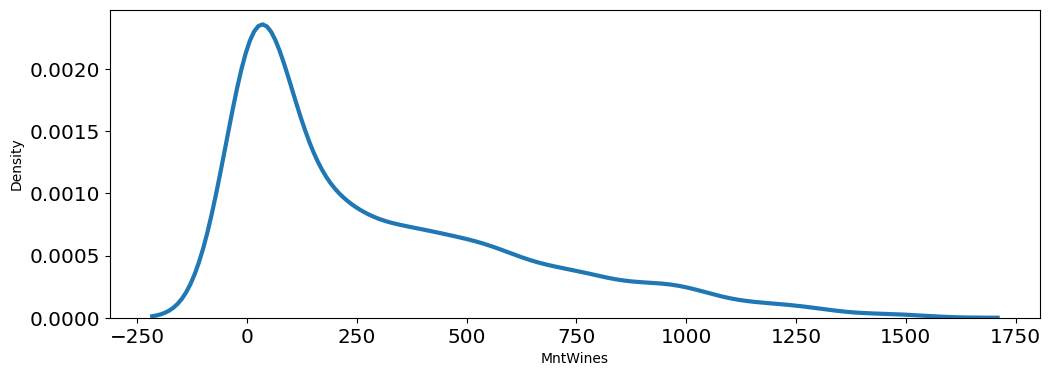

In [14]:
# Distribusi 'MntWines' Asli
sns.kdeplot(dfa['MntWines'])

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: xlabel='MntWines', ylabel='Density'>

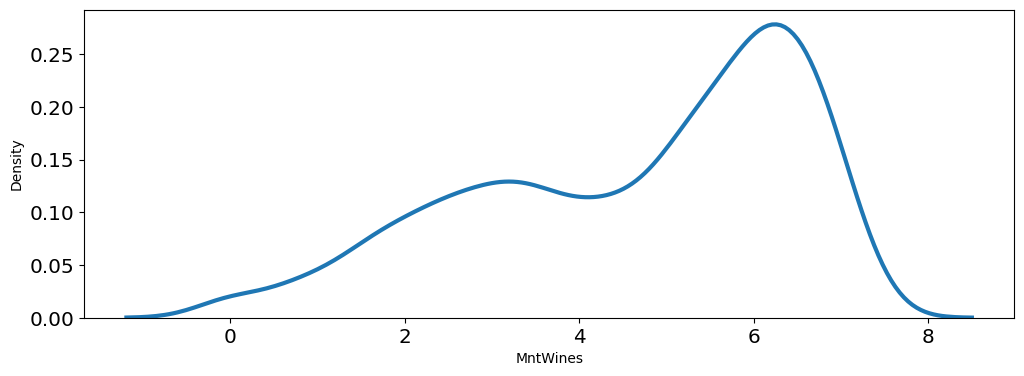

In [15]:
# Distribusi 'MntWines' setelah Log Transformation
sns.kdeplot(np.log(dfa['MntWines']))

<AxesSubplot: xlabel='MntFruits', ylabel='Density'>

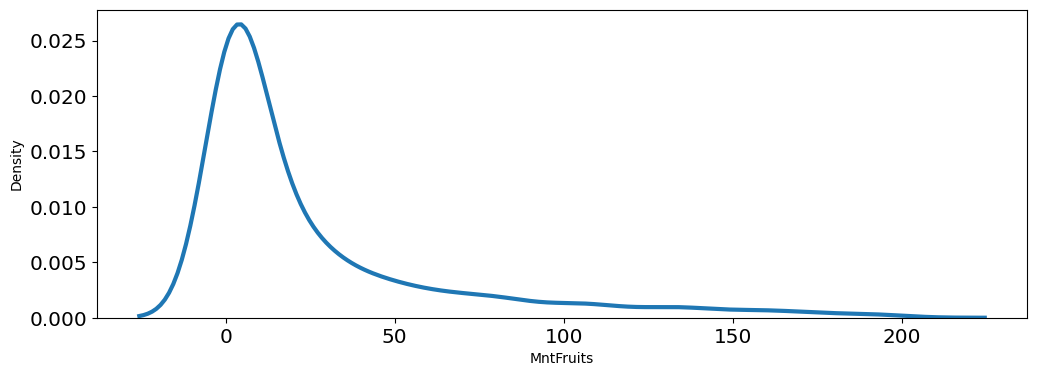

In [16]:
# Distribusi 'MntFruits' Asli
sns.kdeplot(dfa['MntFruits'])

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: xlabel='MntFruits', ylabel='Density'>

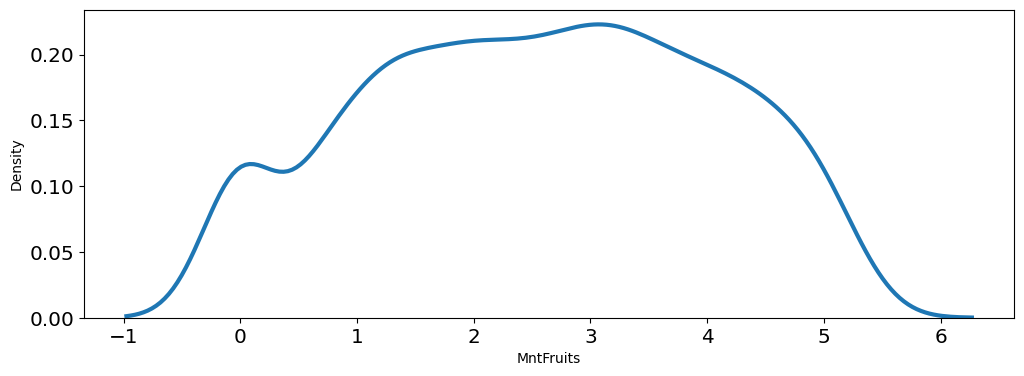

In [17]:
# Distribusi 'MntFruits' setelah Log Transformation
sns.kdeplot(np.log(dfa['MntFruits']))

<AxesSubplot: xlabel='MntMeatProducts', ylabel='Density'>

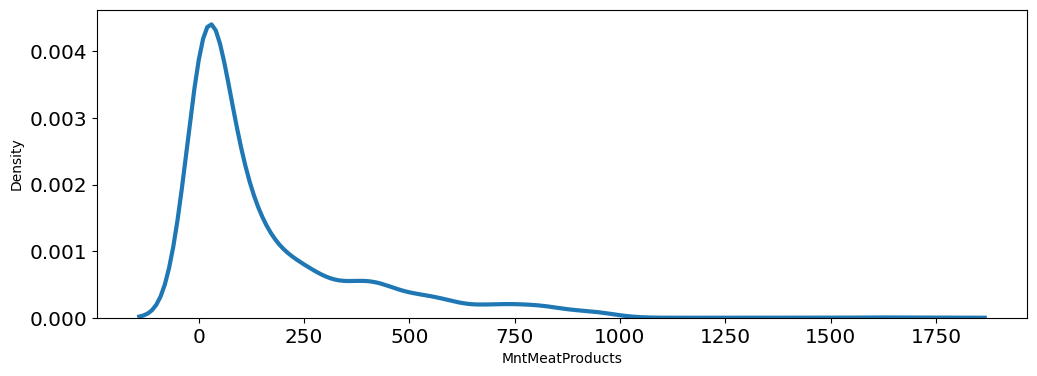

In [18]:
# Distribusi 'MntMeatProducts' Asli
sns.kdeplot(dfa['MntMeatProducts'])

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: xlabel='MntMeatProducts', ylabel='Density'>

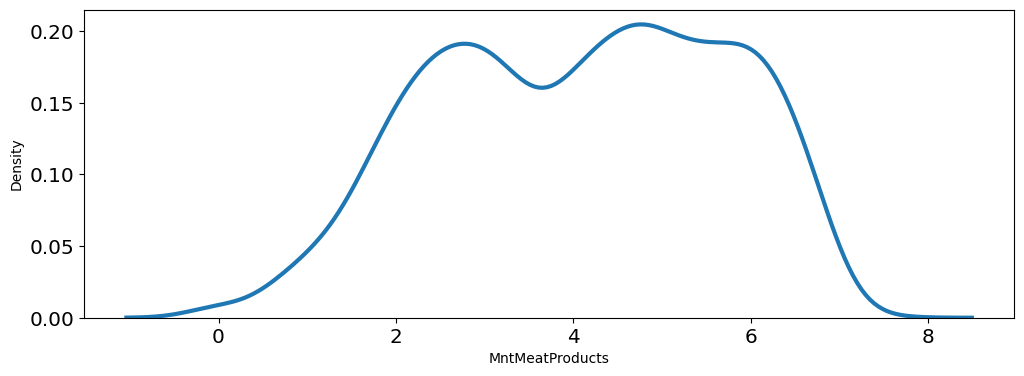

In [19]:
# Distribusi 'MntMeatProducts' setelah Log Transformation
sns.kdeplot(np.log(dfa['MntMeatProducts']))

<AxesSubplot: xlabel='MntFishProducts', ylabel='Density'>

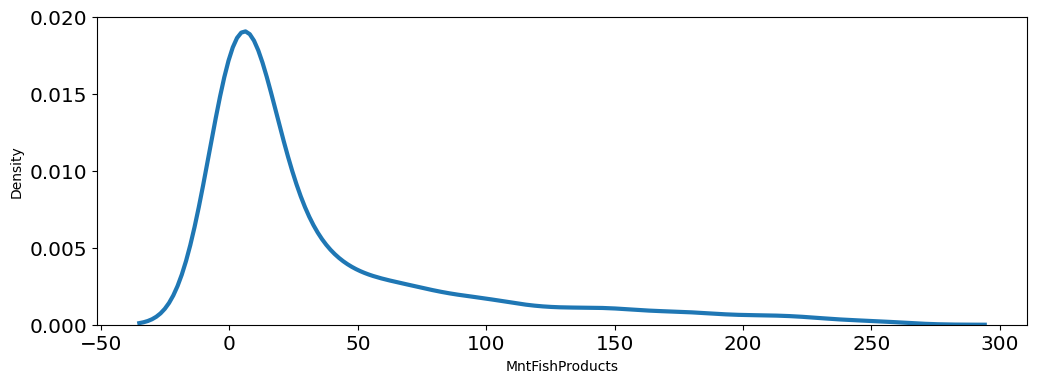

In [20]:
# Distribusi 'MntFishProducts' Asli
sns.kdeplot(dfa['MntFishProducts'])

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: xlabel='MntFishProducts', ylabel='Density'>

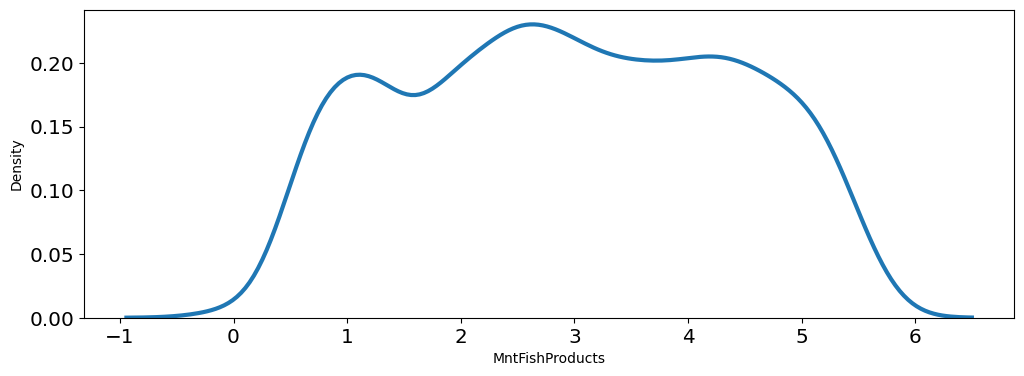

In [21]:
# Distribusi 'MntFishProducts' setelah Log Transformation
sns.kdeplot(np.log(dfa['MntFishProducts']))

<AxesSubplot: xlabel='MntSweetProducts', ylabel='Density'>

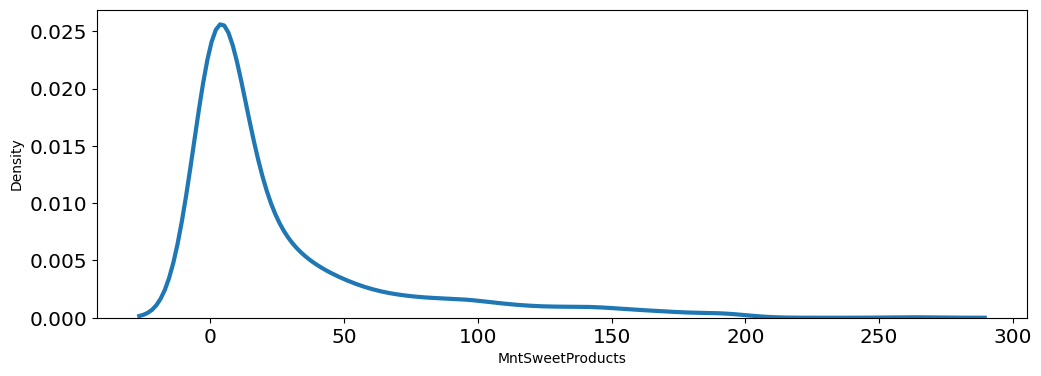

In [22]:
# Distribusi 'MntSweetProducts' Asli
sns.kdeplot(dfa['MntSweetProducts'])

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: xlabel='MntSweetProducts', ylabel='Density'>

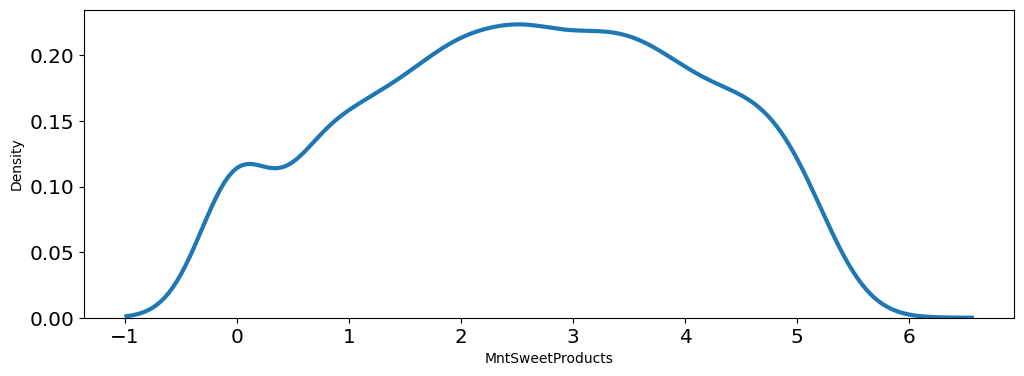

In [23]:
# Distribusi 'MntSweetProducts' setelah Log Transformation
sns.kdeplot(np.log(dfa['MntSweetProducts']))

<AxesSubplot: xlabel='MntGoldProds', ylabel='Density'>

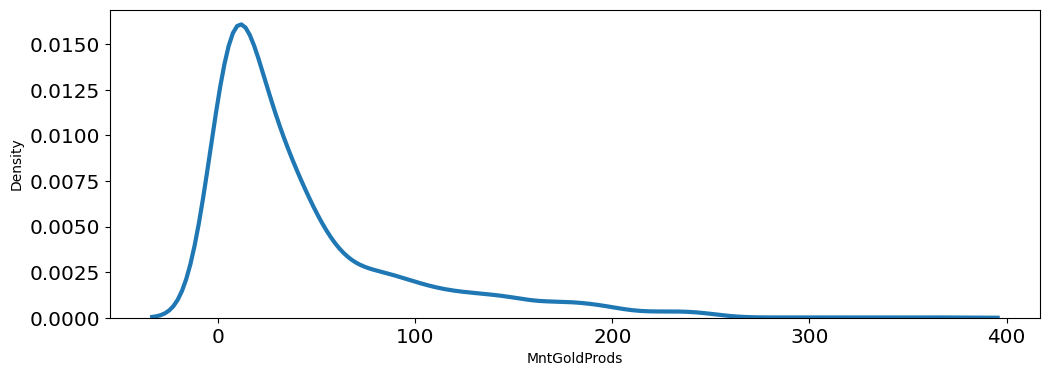

In [24]:
# Distribusi 'MntGoldProds' Asli
sns.kdeplot(dfa['MntGoldProds'])

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: xlabel='MntGoldProds', ylabel='Density'>

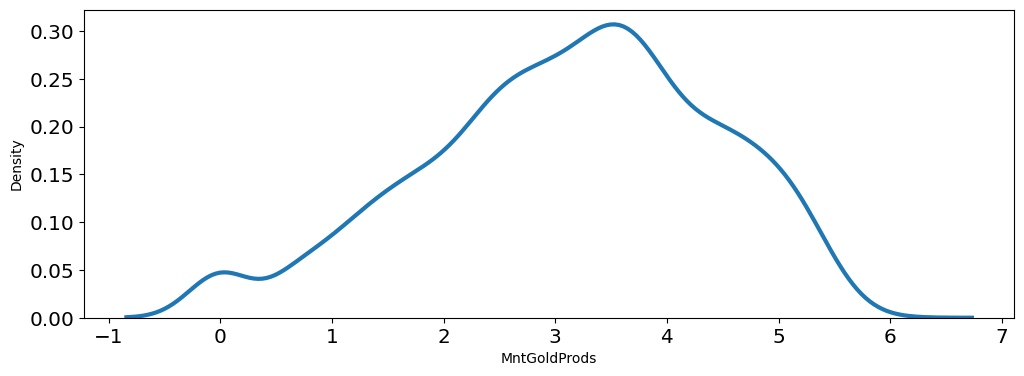

In [25]:
# Distribusi 'MntGoldProds' setelah Log Transformation
sns.kdeplot(np.log(dfa['MntGoldProds']))

<AxesSubplot: xlabel='Total_amount_spent', ylabel='Density'>

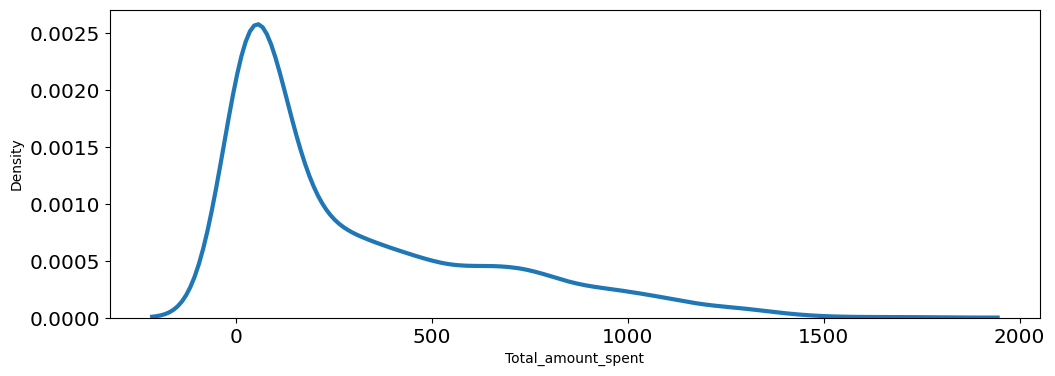

In [26]:
# Distribusi 'Total_amount_spent' Asli
sns.kdeplot(dfa['Total_amount_spent'])

<AxesSubplot: xlabel='Total_amount_spent', ylabel='Density'>

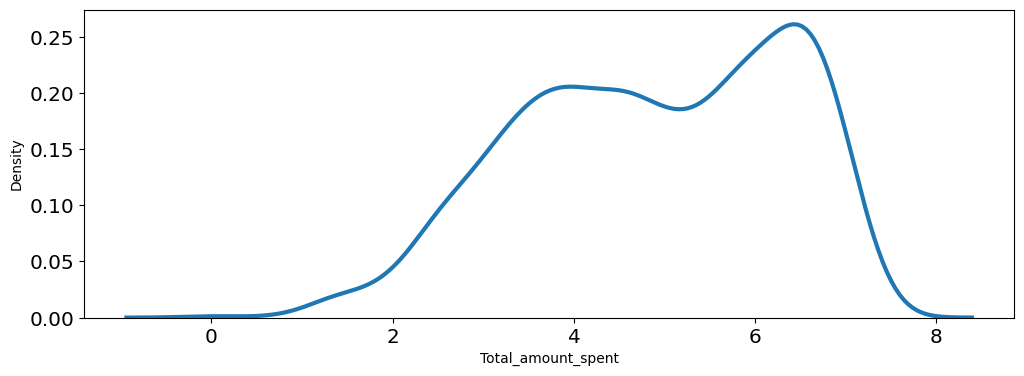

In [27]:
# Distribusi 'Total_amount_spent' setelah Log Transformation
sns.kdeplot(np.log(dfa['Total_amount_spent']))

In [28]:
# kita tranformasi
dfa['log_wines'] = np.log(dfa['MntWines'])
dfa['log_fruits'] = np.log(dfa['MntFruits'])
dfa['log_meats'] = np.log(dfa['MntMeatProducts'])
dfa['log_fish'] = np.log(dfa['MntFishProducts'])
dfa['log_sweet'] = np.log(dfa['MntSweetProducts'])
dfa['log_gold'] = np.log(dfa['MntGoldProds'])
dfa['log_spent'] = np.log(dfa['Total_amount_spent'])

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, me

### 2) Normalization/Standardization

In [29]:
# pengelompokan ulang kolom berdasarkan jenisnya

cats = ['Education', 'Marital_Status']
nums = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'log_wines', 'log_fruits', 'log_meats', 'log_fish', 'log_sweet', 'log_gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response','Age','log_spent', 'Total_amount_spent', 'Total_accept_campaign']
timestamp = ['Dt_Customer']


# pengelompokkan lebih spesifik untuk 'nums'

amount_spent = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'log_wines', 'log_fruits', 'log_meats', 'log_fish', 'log_sweet', 'log_gold']
num_purchases = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
cmp = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
others1 = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency']
others2 = ['Complain', 'NumWebVisitsMonth', 'Age', 'log_spent', 'Total_amount_spent', 'Total_accept_campaign']

In [30]:
dfa[amount_spent].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,log_wines,log_fruits,log_meats,log_fish,log_sweet,log_gold
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,304.991476,26.348587,165.283984,37.642441,27.161507,44.113055,-inf,-inf,-inf,-inf,-inf,-inf
std,336.761943,39.764060,219.336589,54.700548,41.338945,52.091255,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-inf,-inf,-inf,-inf,-inf,-inf
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,3.178054,0.693147,2.772589,1.098612,0.000000,2.197225
50%,176.000000,8.000000,67.000000,12.000000,8.000000,24.000000,5.170484,2.079442,4.204693,2.484907,2.079442,3.178054
75%,505.000000,33.000000,231.000000,50.000000,34.000000,56.000000,6.224558,3.496508,5.442418,3.912023,3.526361,4.025352
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,7.308543,5.293305,7.452982,5.556828,5.572154,5.891644


In [31]:
dfa[num_purchases].describe()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2229.000000,2229.000000,2229.000000,2229.000000
mean,2.319874,4.100045,2.636608,5.812472
std,1.895252,2.775461,2.796161,3.242144
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,3.000000
50%,2.000000,4.000000,2.000000,5.000000
75%,3.000000,6.000000,4.000000,8.000000
max,15.000000,27.000000,28.000000,13.000000


In [32]:
dfa[cmp].describe()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,0.064603,0.013459,0.073127,0.074921,0.072678,0.149843
std,0.245879,0.115255,0.260403,0.263324,0.259666,0.356998
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
dfa[others1].describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,1968.888739,51619.504262,0.444594,0.507402,49.106326
std,11.707430,20601.216248,0.538636,0.544735,28.946476
min,1940.000000,1730.000000,0.000000,0.000000,0.000000
25%,1959.000000,35416.000000,0.000000,0.000000,24.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000
75%,1977.000000,68118.000000,1.000000,1.000000,74.000000
max,1996.000000,113734.000000,2.000000,2.000000,99.000000


In [34]:
dfa[others2].describe()

,Complain,NumWebVisitsMonth,Age,log_spent,Total_amount_spent,Total_accept_campaign
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,0.008973,5.334231,51.111261,4.882305,300.549574,0.298789
std,0.094319,2.414981,11.707430,1.463041,334.621642,0.679597
min,0.000000,0.000000,24.000000,0.000000,1.000000,0.000000
25%,0.000000,3.000000,43.000000,3.737670,42.000000,0.000000
50%,0.000000,6.000000,50.000000,4.962845,143.000000,0.000000
75%,0.000000,7.000000,61.000000,6.180017,483.000000,0.000000
max,1.000000,20.000000,80.000000,7.455298,1729.000000,4.000000


In [35]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'log_spent' kita re-scale ke [0,1]
dfa['deal_norm'] = MinMaxScaler().fit_transform(dfa['NumDealsPurchases'].values.reshape(len(df), 1))
dfa['web_norm'] = MinMaxScaler().fit_transform(dfa['NumWebPurchases'].values.reshape(len(df), 1))
dfa['catalog_norm'] = MinMaxScaler().fit_transform(dfa['NumCatalogPurchases'].values.reshape(len(df), 1))
dfa['store_norm'] = MinMaxScaler().fit_transform(dfa['NumStorePurchases'].values.reshape(len(df), 1))
dfa['web_visit_norm'] = MinMaxScaler().fit_transform(dfa['NumWebVisitsMonth'].values.reshape(len(df), 1))
dfa['log_spent_norm'] = MinMaxScaler().fit_transform(dfa['log_spent'].values.reshape(len(df), 1))

In [36]:
# 'Income', 'Recency', 'Age' kita standarisasi (karena distribusi datanya sudah mendekati normal)
dfa['income_std'] = StandardScaler().fit_transform(dfa['Income'].values.reshape(len(df), 1))
dfa['recency_std'] = StandardScaler().fit_transform(dfa['Recency'].values.reshape(len(df), 1))
dfa['age_std'] = StandardScaler().fit_transform(dfa['Age'].values.reshape(len(df), 1))

In [37]:
# cek keberhasilan feature transformation
dfa.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,log_spent,deal_norm,web_norm,catalog_norm,store_norm,web_visit_norm,log_spent_norm,income_std,recency_std,age_std
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,...,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2.229000e+03,2.229000e+03,2.229000e+03
mean,5589.296097,1968.888739,51619.504262,0.444594,0.507402,49.106326,304.991476,26.348587,165.283984,37.642441,...,4.882305,0.154658,0.151854,0.094165,0.447113,0.266712,0.654877,7.969299e-18,-6.694212e-17,2.151711e-16
std,3244.840538,11.707430,20601.216248,0.538636,0.544735,28.946476,336.761943,39.764060,219.336589,54.700548,...,1.463041,0.126350,0.102795,0.099863,0.249396,0.120749,0.196242,1.000224e+00,1.000224e+00,1.000224e+00
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.422221e+00,-1.696833e+00,-2.316251e+00
25%,2829.000000,1959.000000,35416.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.737670,0.066667,0.074074,0.000000,0.230769,0.150000,0.501344,-7.867079e-01,-8.675308e-01,-6.929856e-01
50%,5455.000000,1970.000000,51381.500000,0.000000,0.000000,49.000000,176.000000,8.000000,67.000000,12.000000,...,4.962845,0.133333,0.148148,0.071429,0.384615,0.300000,0.665680,-1.155552e-02,-3.674007e-03,-9.494056e-02
75%,8420.000000,1977.000000,68118.000000,1.000000,1.000000,74.000000,505.000000,33.000000,231.000000,50.000000,...,6.180017,0.200000,0.222222,0.142857,0.615385,0.350000,0.828943,8.010303e-01,8.601828e-01,8.448445e-01
max,11191.000000,1996.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,7.455298,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.015765e+00,1.724040e+00,2.468110e+00


## B. Feature Encoding

In [38]:
for col in cats:
  print(f'value counts of column {col}')
  print(dfa[col].value_counts())
  print('---'*10, '\n')

value counts of column Education
Graduation    1124
Master         570
PhD            481
Basic           54
Name: Education, dtype: int64
------------------------------ 

value counts of column Marital_Status
Married     861
Together    577
Single      484
Divorced    307
Name: Marital_Status, dtype: int64
------------------------------ 



In [39]:
# Mapping Education
mapping_education = {
    'Basic' : 0,
    'Graduation' : 1,
    'Master' : 2,
    'PhD' : 3
}

dfa['Education'] = dfa['Education'].map(mapping_education)

In [40]:
# One hot encoder Marital_Status
# WARNING: run code ini sekali saja
onehots = pd.get_dummies(dfa['Marital_Status'], prefix='Marital_Status')
dfa = dfa.join(onehots)

In [41]:
dfa = dfa.drop(columns = 'Marital_Status')

In [42]:
dfa.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,store_norm,web_visit_norm,log_spent_norm,income_std,recency_std,age_std,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together
0,5524,1957,1,58138.0,0,0,2012-09-04,58,635,88,...,0.307692,0.35,0.924120,0.316484,0.307314,1.015715,0,0,1,0
1,2174,1954,1,46344.0,1,1,2014-03-08,38,11,1,...,0.153846,0.25,0.371895,-0.256135,-0.383771,1.272020,0,0,1,0
2,4141,1965,1,71613.0,0,0,2013-08-21,26,426,49,...,0.769231,0.20,0.785741,0.970719,-0.798422,0.332234,0,0,0,1
3,6182,1984,1,26646.0,1,0,2014-02-10,26,11,4,...,0.307692,0.30,0.501344,-1.212506,-0.798422,-1.291031,0,0,0,1
4,5324,1981,3,58293.0,1,0,2014-01-19,94,173,43,...,0.461538,0.25,0.740071,0.324010,1.551268,-1.034726,0,1,0,0


In [43]:
# Merubah tipe data Dt_Customer
dfa['Dt_Customer']= pd.to_datetime(dfa['Dt_Customer'])


dfa['Year'] = dfa["Dt_Customer"].dt.year
dfa['Month'] = dfa["Dt_Customer"].dt.month

In [44]:
dfa = dfa.drop(columns = 'Dt_Customer')

In [45]:
dfa = dfa[np.isfinite(dfa).all(1)]

In [46]:
dfa.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,log_spent_norm,income_std,recency_std,age_std,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Year,Month
0,5524,1957,1,58138.0,0,0,58,635,88,546,...,0.924120,0.316484,0.307314,1.015715,0,0,1,0,2012,9
1,2174,1954,1,46344.0,1,1,38,11,1,6,...,0.371895,-0.256135,-0.383771,1.272020,0,0,1,0,2014,3
2,4141,1965,1,71613.0,0,0,26,426,49,127,...,0.785741,0.970719,-0.798422,0.332234,0,0,0,1,2013,8
3,6182,1984,1,26646.0,1,0,26,11,4,20,...,0.501344,-1.212506,-0.798422,-1.291031,0,0,0,1,2014,2
4,5324,1981,3,58293.0,1,0,94,173,43,118,...,0.740071,0.324010,1.551268,-1.034726,0,1,0,0,2014,1


## C. Handle Missing Value

In [47]:
# Split Data Train dan Test
from sklearn.model_selection import train_test_split
train, test = train_test_split(dfa,test_size=1/3, random_state=42)

In [48]:
# Melihat Sample Data Train
train.sample(5)

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,log_spent_norm,income_std,recency_std,age_std,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Year,Month
1295,3099,1970,1,44267.0,1,1,48,183,5,65,...,0.649764,-0.356977,-0.038228,-0.094941,1,0,0,0,2013,2
2156,2429,1954,1,72071.0,0,1,4,531,69,300,...,0.897794,0.992955,-1.558616,1.272020,1,0,0,0,2013,2
508,5389,1964,1,48920.0,0,2,93,238,17,68,...,0.629264,-0.131066,1.516714,0.417669,0,1,0,0,2013,10
784,10446,1957,3,82017.0,0,0,58,184,23,446,...,0.845142,1.475851,0.307314,1.015715,0,1,0,0,2012,11
985,7378,1981,2,42021.0,1,0,34,393,5,136,...,0.696546,-0.466024,-0.521988,-1.034726,0,0,0,1,2012,8


In [49]:
# Melihat Sample Data Test
test.sample(5)

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,log_spent_norm,income_std,recency_std,age_std,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Year,Month
1285,7628,1973,2,43050.0,1,0,10,30,5,24,...,0.513546,-0.416064,-1.351291,-0.351246,0,1,0,0,2014,3
1329,9635,1983,2,35876.0,0,0,13,66,2,40,...,0.555730,-0.764374,-1.247628,-1.205596,0,1,0,0,2014,4
303,6609,1966,1,27038.0,0,0,64,1,26,25,...,0.625520,-1.193474,0.514640,0.246799,1,0,0,0,2012,9
124,7215,1983,1,101970.0,0,0,69,722,27,102,...,0.807942,2.444603,0.687411,-1.205596,0,0,1,0,2013,3
1096,7409,1970,1,53187.0,1,0,66,211,2,30,...,0.539932,0.076105,0.583749,-0.094941,0,0,0,1,2013,10


In [50]:
# Mencari Nilai Null
train.isna().sum()

ID                         0
Year_Birth                 0
Education                  0
Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Age                        0
Total_amount_spent         0
Total_accept_campaign      0
log_wines                  0
log_fruits                 0
log_meats                  0
log_fish                   0
log_sweet     

Dataset sudah bersih, tidak ada missing value (pembersihan missing value sudah dilakukan saat EDA)

## D. Handle Duplicated Data

In [51]:
# cek jumlah duplicated rows
# dari semua kolom
train.duplicated().sum()

0

Dataset sudah tidak ada duplikat.

## E. Handle Outlier

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960 entries, 2024 to 1741
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       960 non-null    int64  
 1   Year_Birth               960 non-null    int64  
 2   Education                960 non-null    int64  
 3   Income                   960 non-null    float64
 4   Kidhome                  960 non-null    int64  
 5   Teenhome                 960 non-null    int64  
 6   Recency                  960 non-null    int64  
 7   MntWines                 960 non-null    int64  
 8   MntFruits                960 non-null    int64  
 9   MntMeatProducts          960 non-null    int64  
 10  MntFishProducts          960 non-null    int64  
 11  MntSweetProducts         960 non-null    int64  
 12  MntGoldProds             960 non-null    int64  
 13  NumDealsPurchases        960 non-null    int64  
 14  NumWebPurchases       

In [55]:
# pengelompokan ulang kolom berdasarkan jenisnya

cats = ['Education']
nums = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'log_wines', 'log_fruits', 'log_meats', 'log_fish', 'log_sweet', 'log_gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Age','log_spent', 'Total_amount_spent', 'Total_accept_campaign', 'deal_norm', 'web_norm', 'catalog_norm', 'store_norm', 'web_visit_norm', 'log_spent_norm', 'income_std', 'recency_std', 'age_std', 'Year', 'Month']
boolean = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 'Response']

# pengelompokkan lebih spesifik untuk 'nums'

amount_spent = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'log_wines', 'log_fruits', 'log_meats', 'log_fish', 'log_sweet', 'log_gold']
num_purchases = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
norm = ['deal_norm', 'web_norm', 'catalog_norm', 'store_norm', 'web_visit_norm', 'log_spent_norm']
std = ['income_std', 'recency_std', 'age_std']
others1 = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'NumWebVisitsMonth']
others2 = ['Age', 'log_spent', 'Total_amount_spent', 'Total_accept_campaign', 'Year', 'Month']

### 1) Melihat Outlier

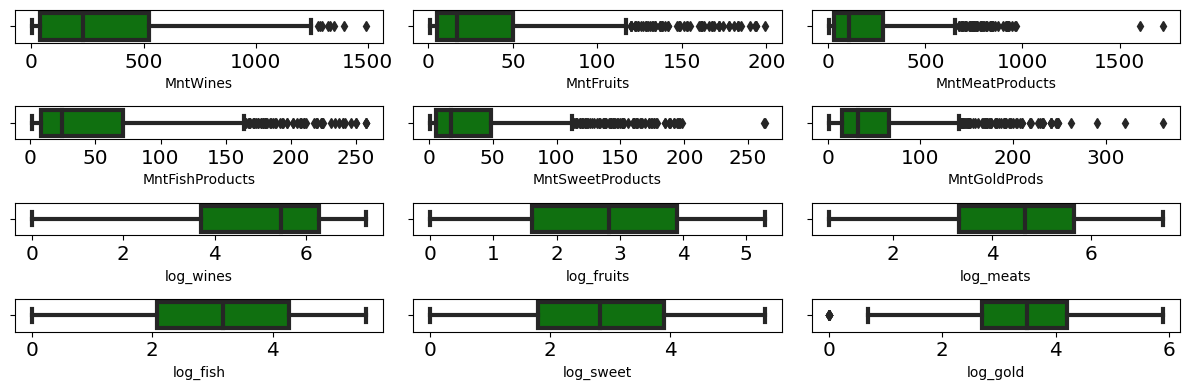

In [58]:
for i in range (0, len(amount_spent)) :
    plt.subplot(4,3, i+1)
    sns.boxplot(x=train[amount_spent[i]], color='green')
    plt.tight_layout()

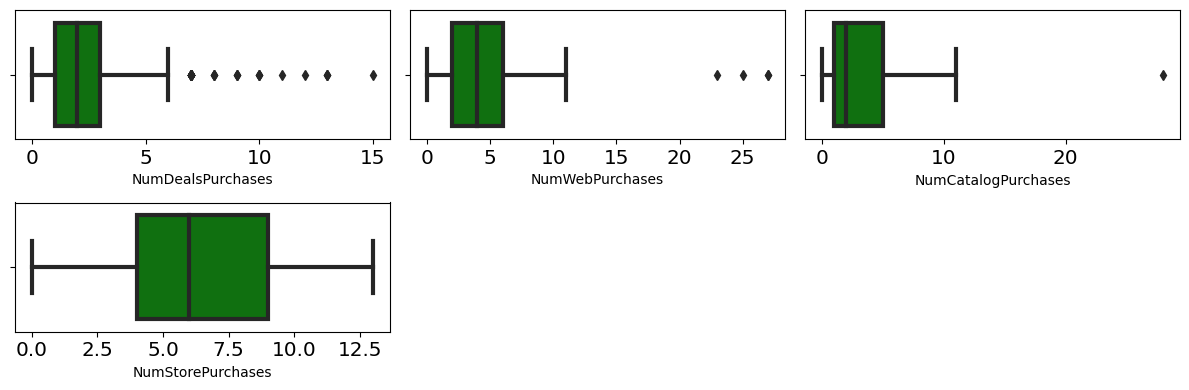

In [59]:
for i in range (0, len(num_purchases)) :
    plt.subplot(2,3, i+1)
    sns.boxplot(x=train[num_purchases[i]], color='green')
    plt.tight_layout()

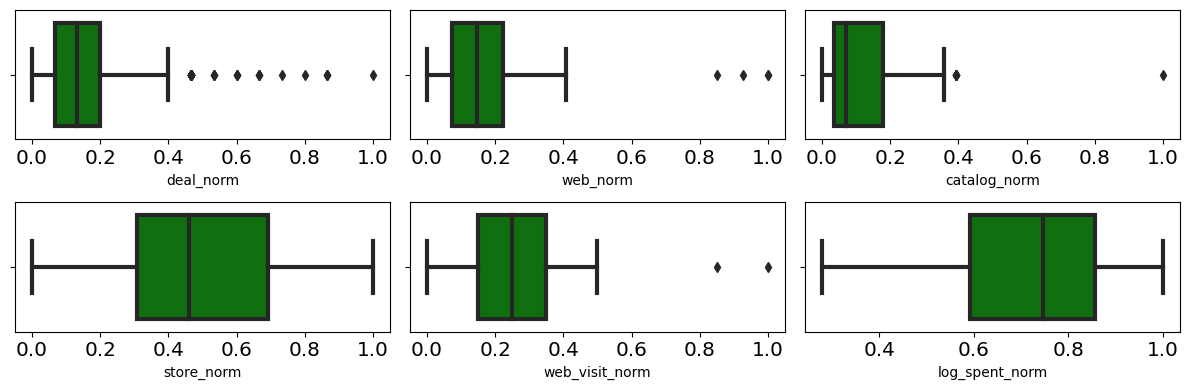

In [60]:
for i in range (0, len(norm)) :
    plt.subplot(2,3, i+1)
    sns.boxplot(x=train[norm[i]], color='green')
    plt.tight_layout()

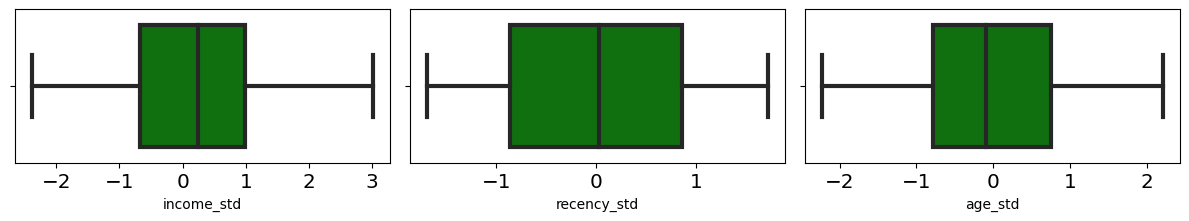

In [61]:
for i in range (0, len(std)) :
    plt.subplot(2,3, i+1)
    sns.boxplot(x=train[std[i]], color='green')
    plt.tight_layout()

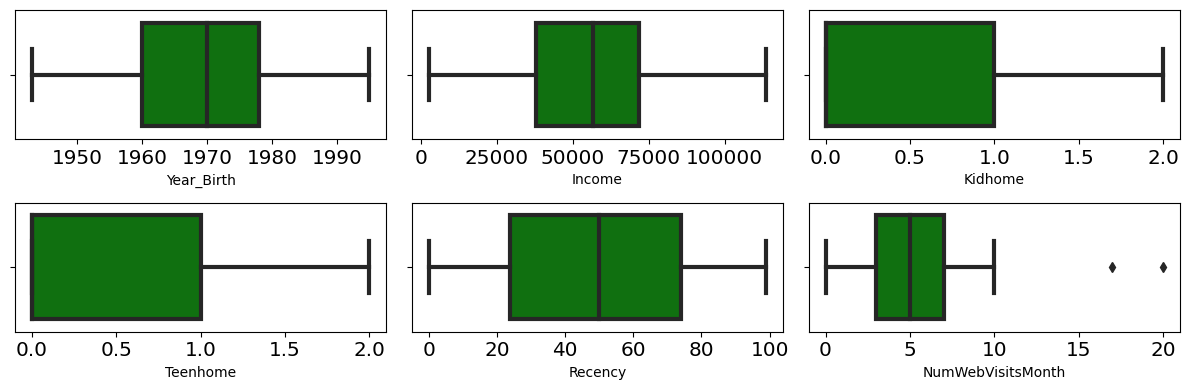

In [62]:
for i in range (0, len(others1)) :
    plt.subplot(2,3, i+1)
    sns.boxplot(x=train[others1[i]], color='green')
    plt.tight_layout()

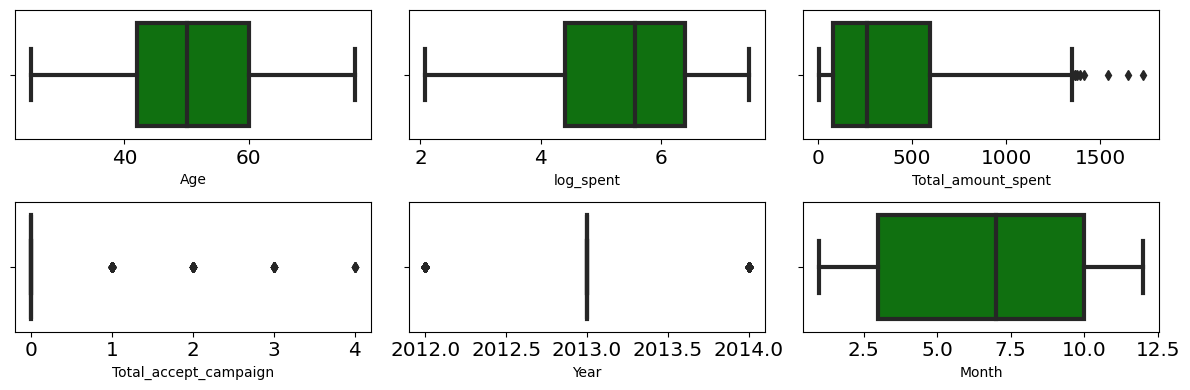

In [63]:
for i in range (0, len(others2)) :
    plt.subplot(2,3, i+1)
    sns.boxplot(x=train[others2[i]], color='green')
    plt.tight_layout()

### 2) Menghapus Outlier

In [64]:
outlier = ['deal_norm', 'web_norm', 'catalog_norm', 'web_visit_norm', 'log_spent_norm', 'log_gold']
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(train)}')

filtered_entries = np.array([True] * len(train))

for col in outlier:
    zscore = abs(stats.zscore(train[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) # keep yang kurang dari 3 absolute z-scorenya
    
train = train[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(train)}')

Jumlah baris sebelum memfilter outlier: 960
Jumlah baris setelah memfilter outlier: 950


## F. Imbalanced Data

In [65]:
# pemisahan features vs target pada data training
x_train = train.drop(columns=['ID','Z_CostContact', 'Z_Revenue', 'Response'])
y_train = train[['Response']]
print(x_train.shape)
print(y_train.shape)

(950, 48)
(950, 1)


In [66]:
# pemisahan features vs target pada data testing
x_test = test.drop(columns=['ID','Z_CostContact', 'Z_Revenue', 'Response'])
y_test = test[['Response']]
print(x_test.shape)
print(y_test.shape)

(481, 48)
(481, 1)


In [67]:
# Melihat keadaan Target
y_train['Response'].value_counts()

0    794
1    156
Name: Response, dtype: int64

In [68]:
from imblearn import under_sampling, over_sampling
x_train_under, y_train_under = under_sampling.RandomUnderSampler(sampling_strategy = 'auto').fit_resample(x_train, y_train)
x_train_over, y_train_over = over_sampling.RandomOverSampler(sampling_strategy = 'auto').fit_resample(x_train, y_train)
x_train_over_SMOTE, y_train_over_SMOTE = over_sampling.SMOTE(sampling_strategy = 'auto').fit_resample(x_train, y_train)

In [69]:
print('Original')
print(y_train.value_counts())
print('\n')
print('UNDERSAMPLING')
print(y_train_under.value_counts())
print('\n')
print('OVERSAMPLING')
print(y_train_over.value_counts())
print('\n')
print('SMOTE')
print(y_train_over_SMOTE.value_counts())

Original
Response
0           794
1           156
dtype: int64


UNDERSAMPLING
Response
0           156
1           156
dtype: int64


OVERSAMPLING
Response
0           794
1           794
dtype: int64


SMOTE
Response
0           794
1           794
dtype: int64


Kami akan menggunakan data train yang sudah di-SMOTE, karena dalam metode SMOTE dataset ditambah dengan data sintesis.

## ***2. Feature Engineering***

Cek feature yang ada sekarang, lalu lakukan: <br>
A. Feature selection (membuang feature yang kurang relevan atau redundan) <br>
B. Feature extraction (membuat feature baru dari feature yang sudah ada) <br>
C. Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset) yang mungkin akan sangat membantu membuat performansi model semakin bagus (ini hanya ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya dan tidak perlu diimplementasikan) <br>

* Untuk 2A & 2B, tetap tuliskan jika memang tidak bisa dilakukan (contoh: “Semua feature digunakan untuk modelling (tidak ada yang dihapus), karena semua feature relevan”)

<AxesSubplot: >

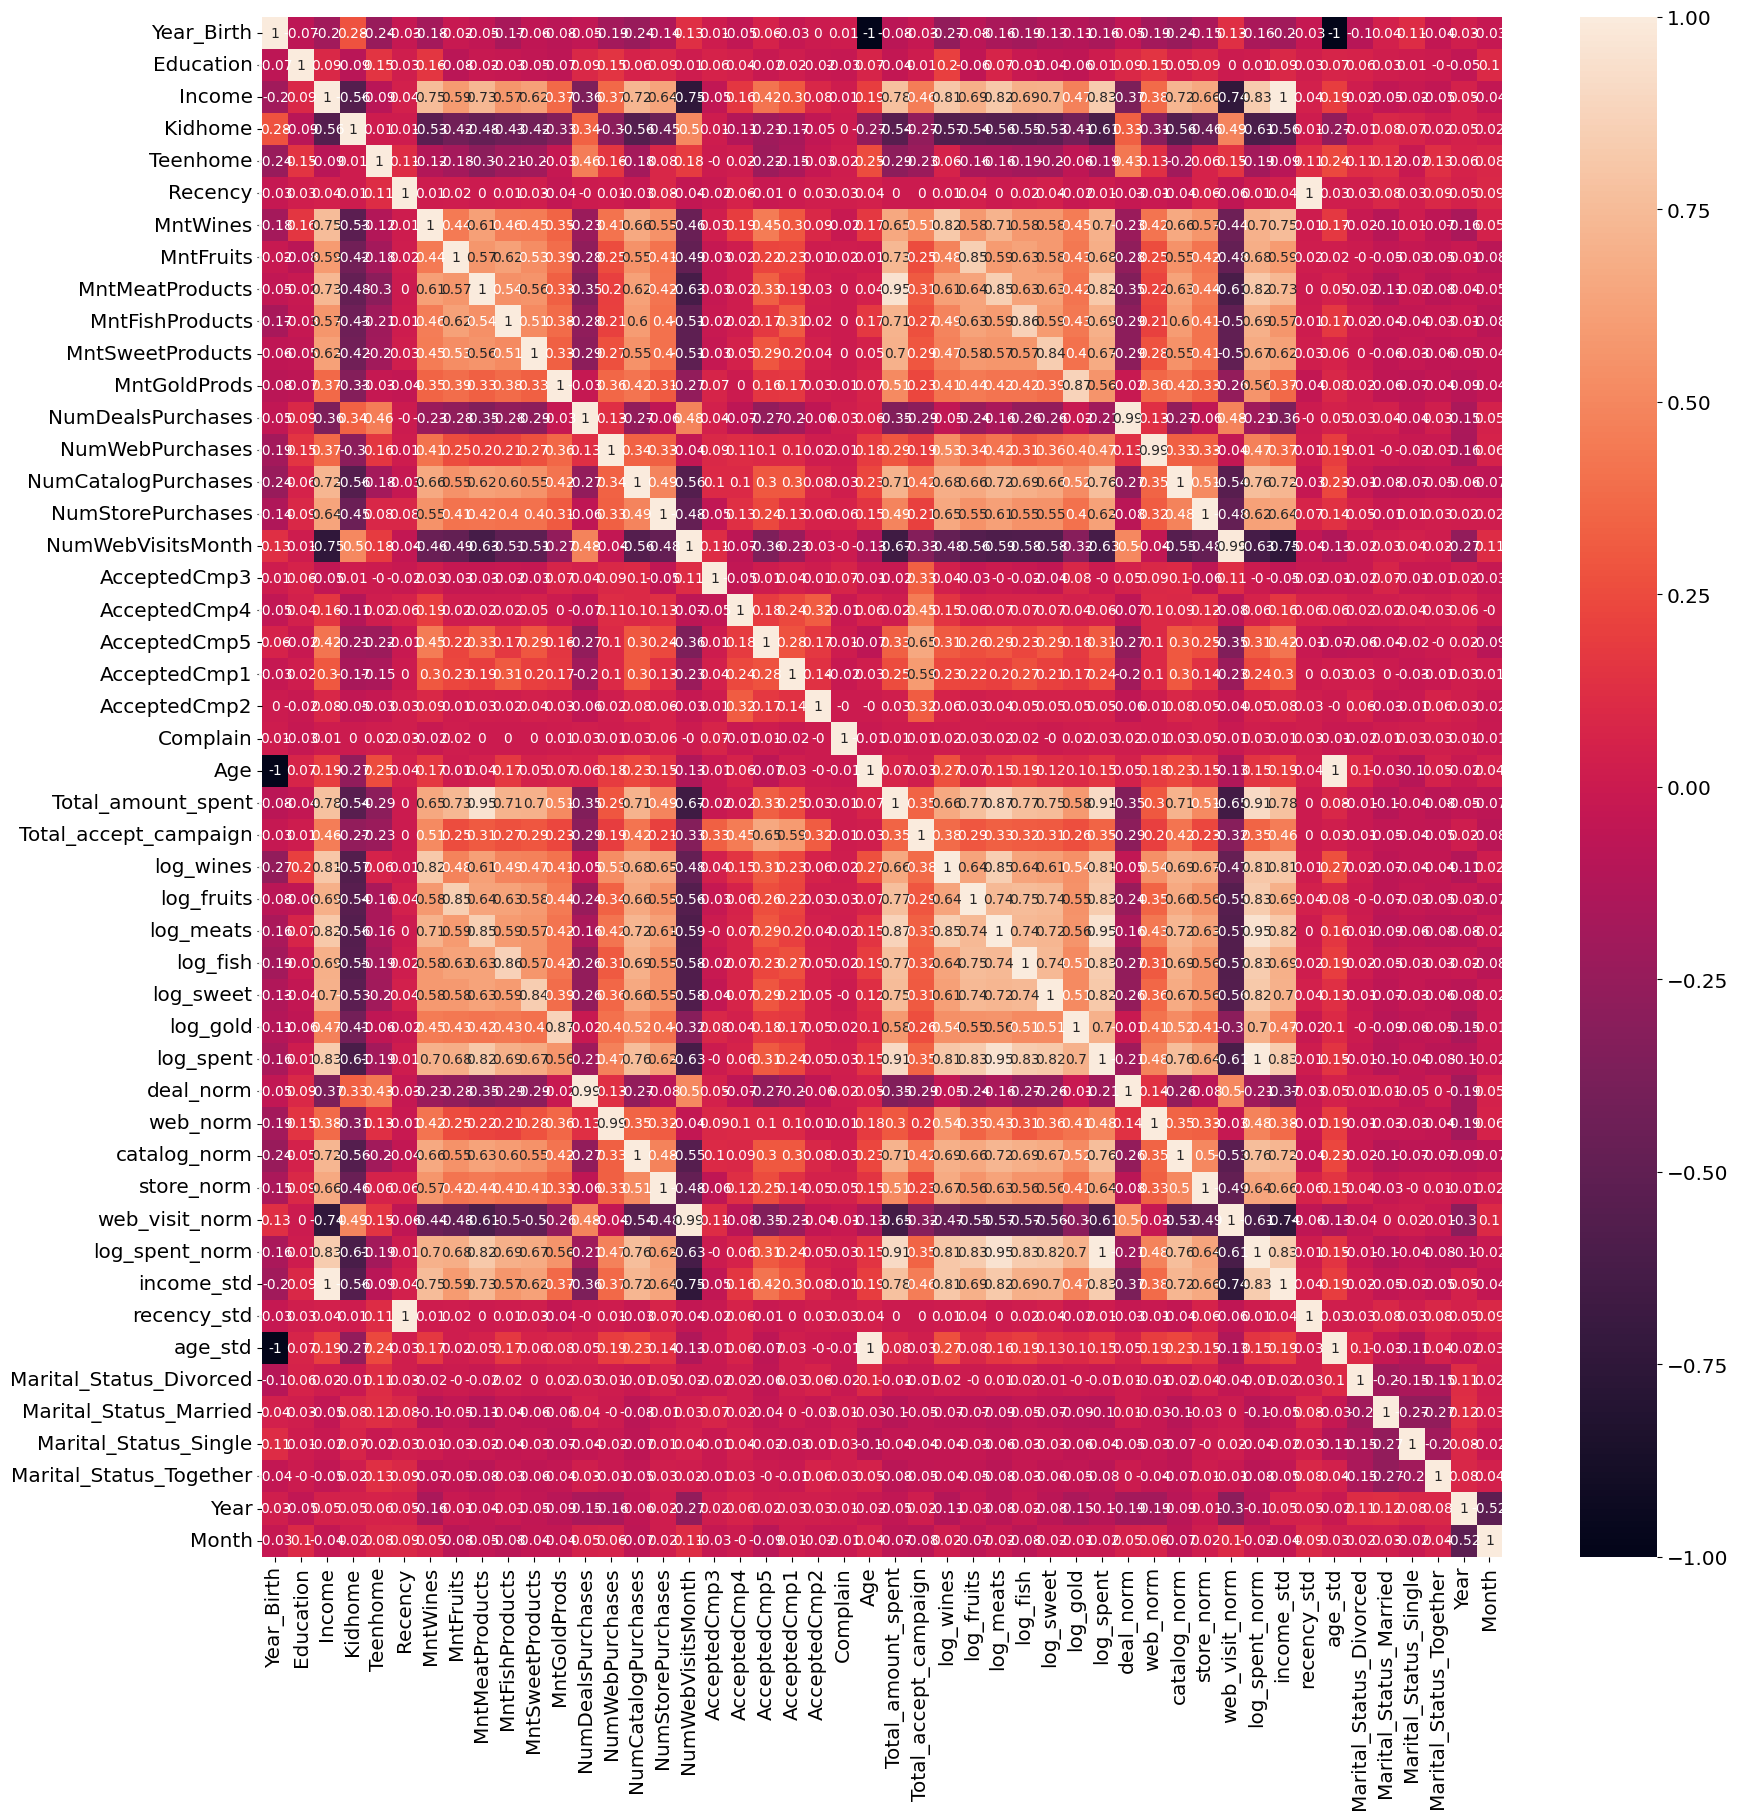

In [71]:
# Mengecek kembali korelasi
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(round(x_train_over_SMOTE.corr(), 2), annot = True)